In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn import datasets 
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn import tree
import statsmodels.api as sm
import random
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.metrics import accuracy_score
students = pd.read_csv('data.csv', delimiter=',');
students.head()

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,L
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,M


In [2]:
random.seed(1)

In [3]:
#convert the string values to numbers and cleaning the data

def cleanstage(x):
    if x=='lowerlevel' or x=='L':
        return 0
    elif x=="MiddleSchool"or x=='M':
        return 1
    else:
        return 2
students.StageID=students.StageID.apply(lambda y:cleanstage(y))
students['gender']=students.gender.apply(lambda x: 0 if x=='M' else 1)
students.ParentschoolSatisfaction=students.ParentschoolSatisfaction.apply(lambda x: 1 if x=='Good' else 0)
students.StudentAbsenceDays=students.StudentAbsenceDays.apply(lambda x: 0 if x=="Under-7" else 1)
students.Semester=students.Semester.apply(lambda x: 0 if x=='F' else 1)# 0=F - 1=S
students.GradeID=students.GradeID.apply(lambda x: int(x[2:]))
students.Relation=students.Relation.apply(lambda x: 0 if x=='Father' else 1)
students.ParentAnsweringSurvey=students.ParentAnsweringSurvey.apply(lambda x: 1 if x=='Yes' else 0)
students.NationalITy=students.NationalITy.apply(lambda x: 1 if x=='KW' else 0) #mesh metamna
students.PlaceofBirth=students.PlaceofBirth.apply(lambda x: 1 if x=='KuwaIT' else 0)  #mesh metamna
students.SectionID=students.SectionID.apply(lambda x: 1 if x=='A' else 0)  #mesh metamna
students.Topic=students.Topic.apply(lambda x: 1 if x=='IT' else 0)  #mesh metamna

students.Class=students.Class.apply(lambda x:cleanstage(x))
students.head()

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,0,1,1,0,4,1,1,0,0,15,16,2,20,1,1,0,1
1,0,1,1,0,4,1,1,0,0,20,20,3,25,1,1,0,1
2,0,1,1,0,4,1,1,0,0,10,7,0,30,0,0,1,0
3,0,1,1,0,4,1,1,0,0,30,25,5,35,0,0,1,0
4,0,1,1,0,4,1,1,0,0,40,50,12,50,0,0,1,1


In [4]:
data=students.iloc[:,0:17].values
random.shuffle(data)
x=data[:,0:16]
y=data[:,16]

In [5]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3 , random_state = 0)

In [6]:
sc = StandardScaler()   #Feature scaling is a general trick applied to optimization problems (not just SVM). The underline algorithm to solve the optimization problem of SVM is gradient descend.
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [7]:
from sklearn.cluster import KMeans
x = students[['AnnouncementsView', 'Discussion']].values

In [8]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++' , n_init=9, max_iter=300,random_state=10,n_jobs=1)

kmeans.fit(x)
k_means_labels = kmeans.labels_
k_means_cluster_centers = kmeans.cluster_centers_

acc=accuracy_score(y, kmeans.labels_)
print("Accuracy score is", acc)

Accuracy score is 0.30833333333333335


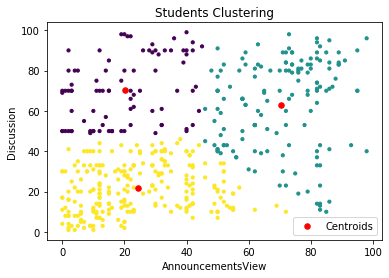

In [9]:
#visualize
plt.scatter(x[:, 0], x[:,1], s = 10, c = kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 30, c = 'red',label = 'Centroids')
plt.title('Students Clustering')
plt.xlabel('AnnouncementsView')
plt.ylabel('Discussion')
plt.legend()

plt.show()